# Step 1: Problem Understanding

# Step 2: Data Loading

In [1]:
# Step 2: Load the Data
# First, I will load all the CSV files from January to April 2025.
# I want to combine them into one DataFrame for analysis.

import os
import pandas as pd

folder_path = "C:/Users/patil/OneDrive/Desktop/Jayesh_WorkSpace/JC_2025_data"
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
print("Files to load:", csv_files)

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Combine months
data = pd.concat(df_list, ignore_index=True)
print("Combined data shape:", data.shape)


Files to load: ['JC-202501-citibike-tripdata.csv', 'JC-202502-citibike-tripdata.csv', 'JC-202503-citibike-tripdata.csv', 'JC-202504-citibike-tripdata.csv']
Combined data shape: (250712, 13)


# I combined 4 months to analyze trends across a quarter. This helps see patterns more clearly rather than focusing on a single month.

# Step 3: Initial Data Check

In [2]:
# Step 3: Check the data
# Let’s see the first few rows and missing values
data.head()
data.isnull().sum()


ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name      586
end_station_id        686
start_lat               0
start_lng               0
end_lat                58
end_lng                58
member_casual           0
dtype: int64

# Most columns are complete. Only a few trips are missing end_station_name or end_station_id (likely incomplete trips or data errors), which is less than 1% of the dataset. For most analyses, these missing values won’t significantly affect insights, but I will be careful when analyzing top end stations or flows.

# Step 4: Feature Engineering

# 1. Convert start and end times to datetime

In [3]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# 2. Create trip duration (in minutes)

In [4]:
data['trip_duration_min'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# 3. Remove trips with zero or negative duration

In [5]:
data = data[data['trip_duration_min'] > 0]

 # 4. Create additional time-based features

In [6]:
data['day_of_week'] = data['started_at'].dt.day_name()
data['hour_of_day'] = data['started_at'].dt.hour

# 5. Preview cleaned data

In [7]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min,day_of_week,hour_of_day
0,880A0159BA5275FB,electric_bike,2025-01-16 17:50:49.136,2025-01-16 17:57:00.710,Hilltop,JC019,Pershing Field,JC024,40.731169,-74.057574,40.742677,-74.051789,member,6.192900,Thursday,17
1,1A5E1E274B2AF0AD,electric_bike,2025-01-31 06:10:41.818,2025-01-31 06:22:09.499,Hilltop,JC019,Jackson Square,JC063,40.731169,-74.057574,40.711130,-74.078900,member,11.461350,Friday,6
2,EA9928D3C05B8377,classic_bike,2025-01-09 16:42:50.213,2025-01-09 17:04:12.870,Hilltop,JC019,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.731169,-74.057574,40.735938,-74.030305,member,21.377617,Thursday,16
3,3C42C367750B9292,electric_bike,2025-01-21 16:14:14.398,2025-01-21 16:37:10.458,Hilltop,JC019,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.731169,-74.057574,40.735938,-74.030305,member,22.934333,Tuesday,16
4,94D3B0265A7BDE1F,classic_bike,2025-01-30 16:38:18.840,2025-01-30 17:04:08.166,Hilltop,JC019,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.731169,-74.057574,40.735938,-74.030305,member,25.822100,Thursday,16


In [8]:
data.shape

(250712, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250712 entries, 0 to 250711
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             250712 non-null  object        
 1   rideable_type       250712 non-null  object        
 2   started_at          250712 non-null  datetime64[ns]
 3   ended_at            250712 non-null  datetime64[ns]
 4   start_station_name  250712 non-null  object        
 5   start_station_id    250712 non-null  object        
 6   end_station_name    250126 non-null  object        
 7   end_station_id      250026 non-null  object        
 8   start_lat           250712 non-null  float64       
 9   start_lng           250712 non-null  float64       
 10  end_lat             250654 non-null  float64       
 11  end_lng             250654 non-null  float64       
 12  member_casual       250712 non-null  object        
 13  trip_duration_min   250712 no

In [10]:
data.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name      586
end_station_id        686
start_lat               0
start_lng               0
end_lat                58
end_lng                58
member_casual           0
trip_duration_min       0
day_of_week             0
hour_of_day             0
dtype: int64

# Step 5: Visual Exploratory Data Analysis

# 1. Trips by User Type

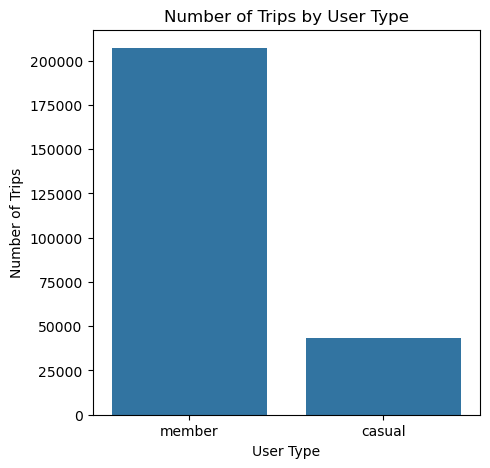

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.countplot(x='member_casual', data=data)
plt.title("Number of Trips by User Type")
plt.xlabel("User Type")
plt.ylabel("Number of Trips")
plt.show()

# 2. Trip Duration Distribution (Focus ≤ 60 min)

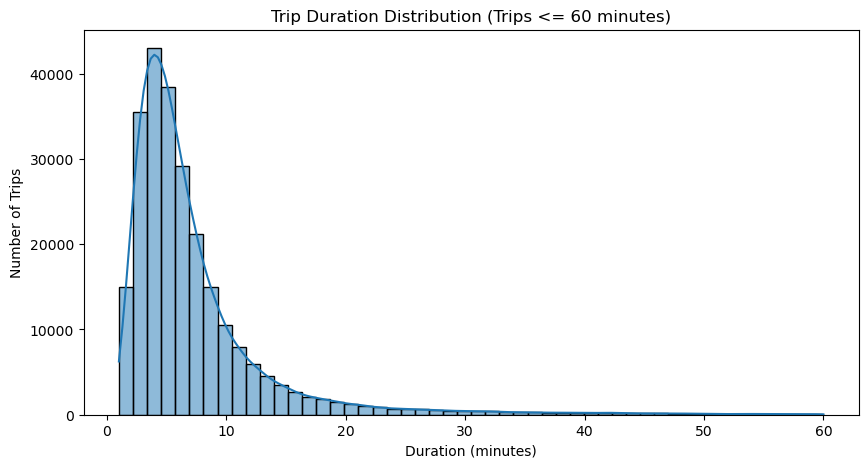

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['trip_duration_min'] <= 60]['trip_duration_min'], bins=50, kde=True)
plt.title("Trip Duration Distribution (Trips <= 60 minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Trips")
plt.show()

# 3. Trips by Hour of Day

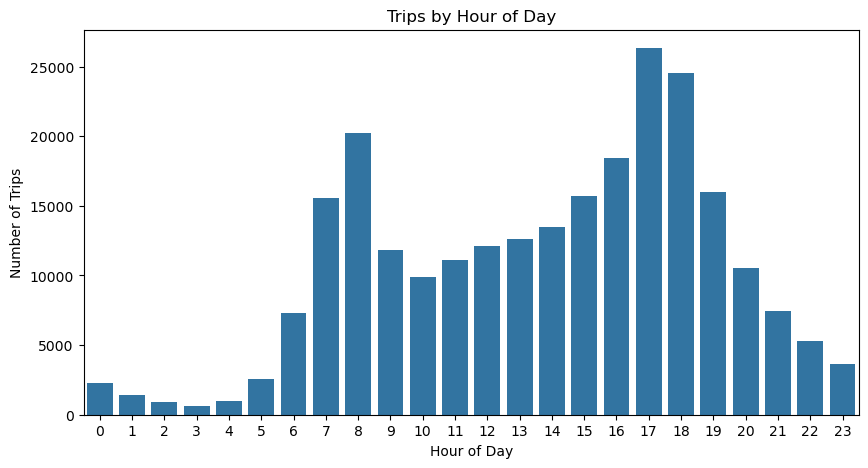

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour_of_day', data=data)
plt.title("Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

# 4. Trips by Day of Week

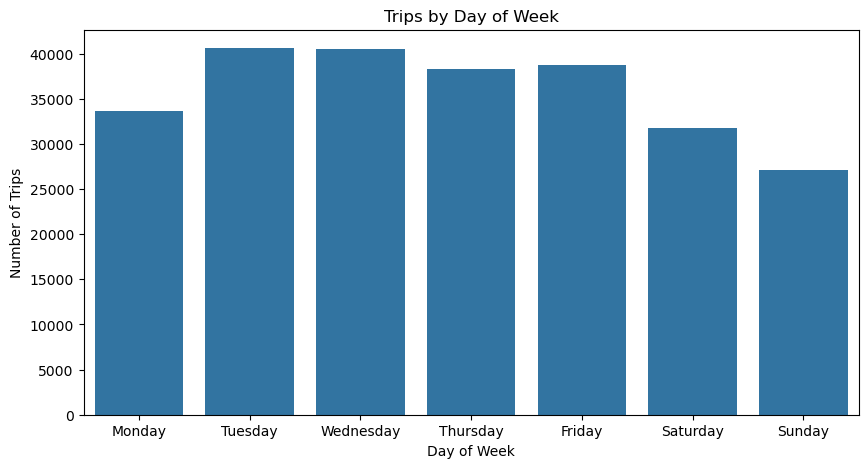

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', data=data,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Trips by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

# 5. Top 10 Start and End Stations

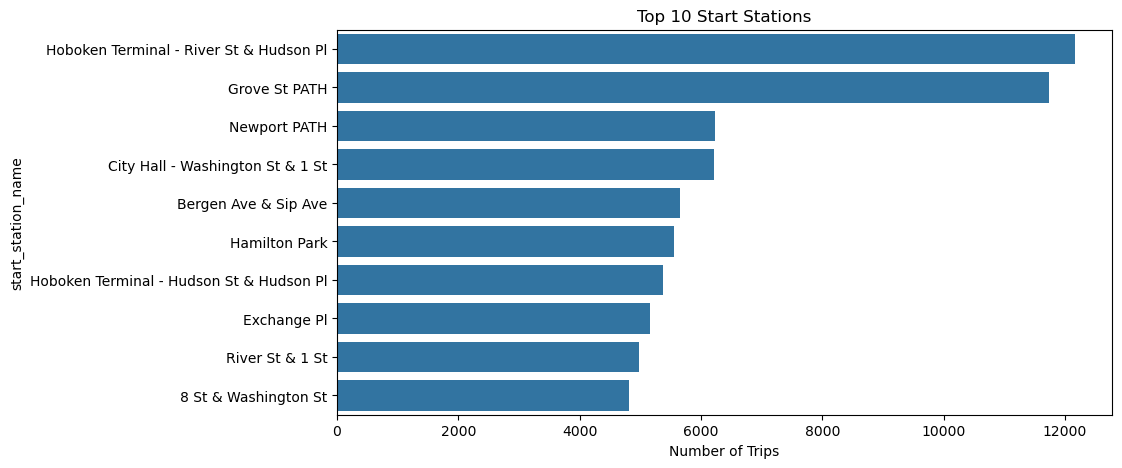

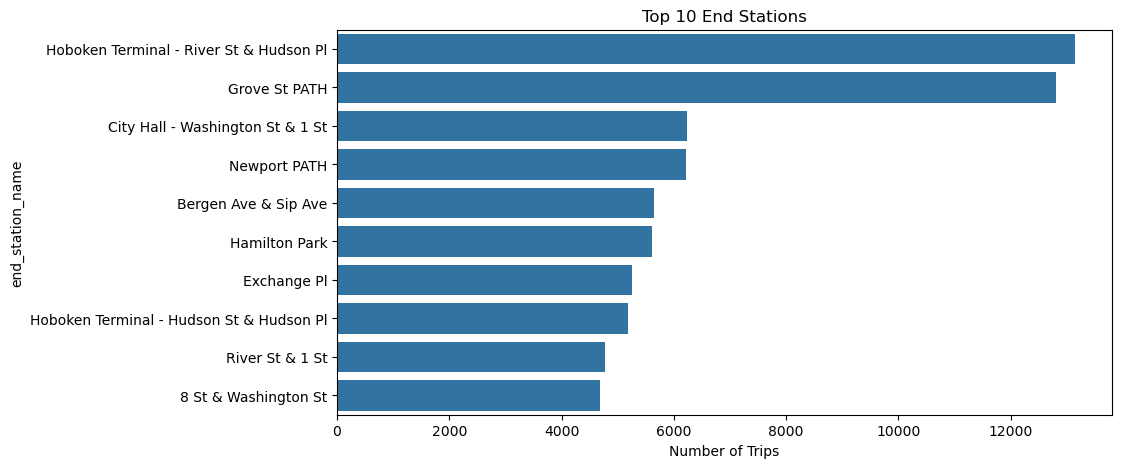

In [15]:
# Top 10 Start Stations
top_start = data['start_station_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_start.values, y=top_start.index)
plt.title("Top 10 Start Stations")
plt.xlabel("Number of Trips")
plt.show()

# Top 10 End Stations
top_end = data['end_station_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_end.values, y=top_end.index)
plt.title("Top 10 End Stations")
plt.xlabel("Number of Trips")
plt.show()


# 6. Trips by Hour and User Type

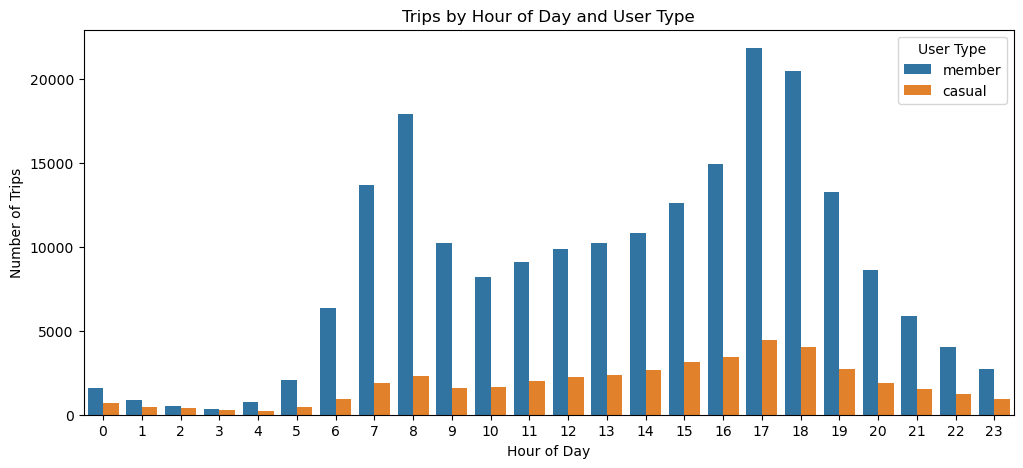

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='hour_of_day', hue='member_casual', data=data)
plt.title("Trips by Hour of Day and User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="User Type")
plt.show()

# Step 7a: Station-to-Station Flows

# 1. Identify Top Flows
We want to see which routes are most popular. This helps in planning bike redistribution and understanding commuter patterns.

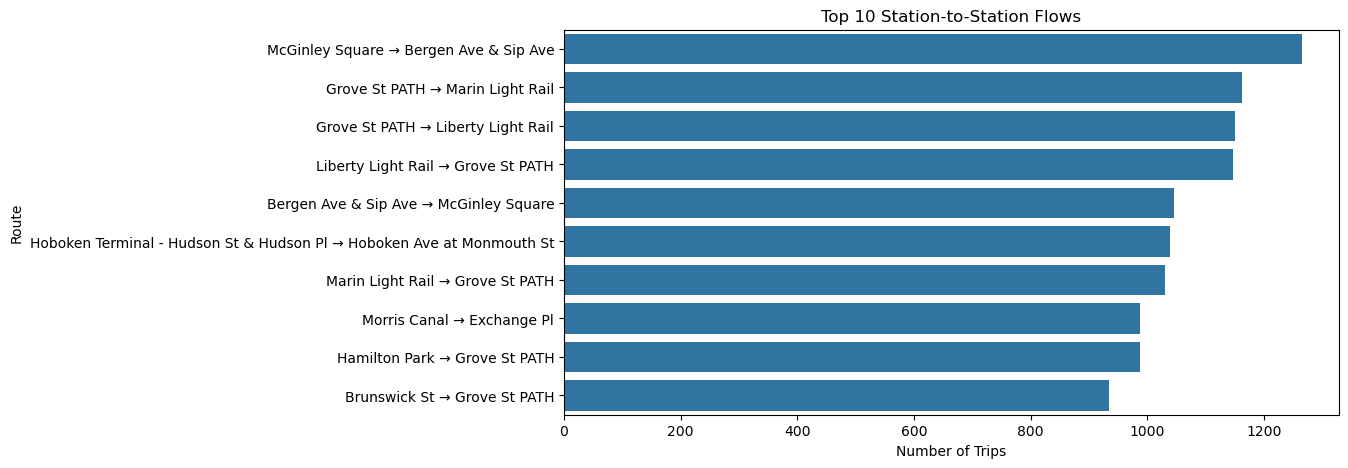

In [17]:
# Aggregate trips by start and end station
top_flows = data.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='trip_count')

# Sort by number of trips descending and take top 10
top_flows_sorted = top_flows.sort_values(by='trip_count', ascending=False).head(10)

# Create a combined route column for visualization
top_flows_sorted['route'] = top_flows_sorted['start_station_name'] + " → " + top_flows_sorted['end_station_name']

# Plot top 10 flows
plt.figure(figsize=(10,5))
sns.barplot(x='trip_count', y='route', data=top_flows_sorted)
plt.title("Top 10 Station-to-Station Flows")
plt.xlabel("Number of Trips")
plt.ylabel("Route")
plt.show()

# Step 7b: Trip Duration by User Type

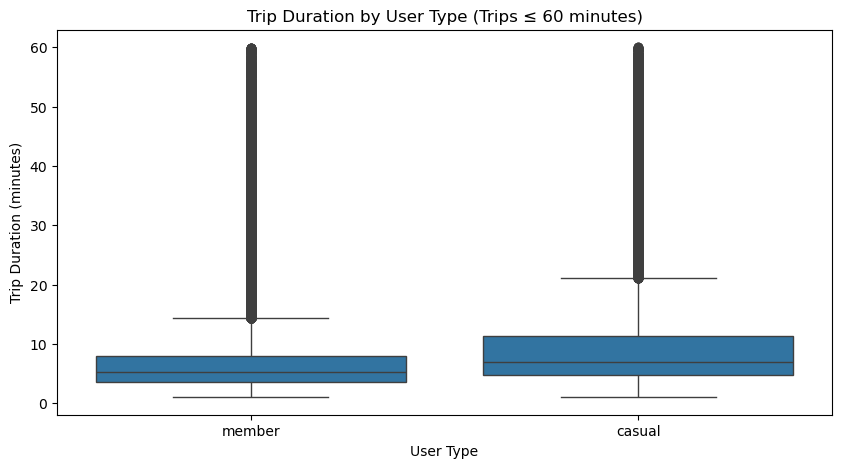

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='member_casual', y='trip_duration_min', data=data[data['trip_duration_min'] <= 60])
plt.title("Trip Duration by User Type (Trips ≤ 60 minutes)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()

# Step 7c: Key Insights

# Step 8 – Conclusion & Future Work

> **Author note (why I did this):**  
> I picked these four months to keep the dataset manageable while showing quarterly patterns. My goal was to produce practical insights an operations manager could use quickly — for example, simple rebalancing suggestions that don't require advanced models.